In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: CPB
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


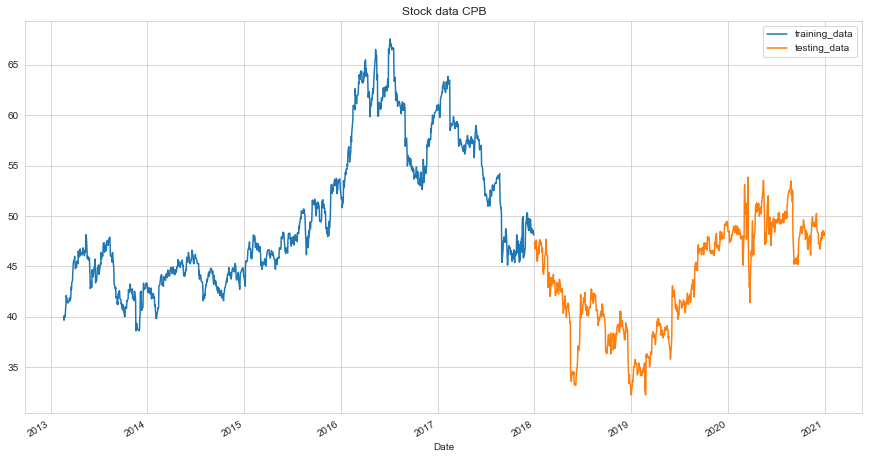

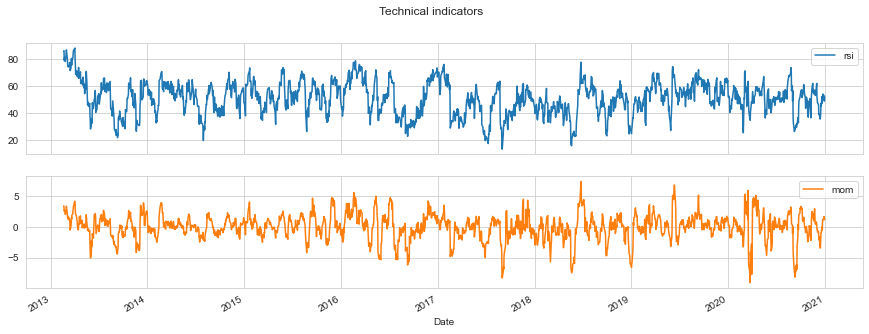

In [2]:
stock_name = 'cpb'.upper()
industry = 'Consumer defensive'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1165.26, duration: 0:00:00.257056
episode: 2/2000, episode end value: 1155.13, duration: 0:00:00.257057
episode: 3/2000, episode end value: 1156.90, duration: 0:00:00.269063
episode: 4/2000, episode end value: 1151.76, duration: 0:00:00.278063
episode: 5/2000, episode end value: 1126.49, duration: 0:00:00.238053
episode: 6/2000, episode end value: 1109.37, duration: 0:00:00.253056
episode: 7/2000, episode end value: 1102.36, duration: 0:00:00.242053
episode: 8/2000, episode end value: 1091.54, duration: 0:00:00.247052
episode: 9/2000, episode end value: 1086.35, duration: 0:00:00.229062
episode: 10/2000, episode end value: 1155.87, duration: 0:00:00.223035
episode: 11/2000, episode end value: 1120.29, duration: 0:00:00.217048
episode: 12/2000, episode end value: 1097.45, duration: 0:00:00.211047
episode: 13/2000, episode end value: 1112.29, duration: 0:00:00.212064
episode: 14/2000, episode end value: 1138.56, duration: 0:00:00.215048
episode: 15/200

episode: 117/2000, episode end value: 1115.24, duration: 0:00:00.321072
episode: 118/2000, episode end value: 1118.39, duration: 0:00:00.285061
episode: 119/2000, episode end value: 1092.64, duration: 0:00:00.290067
episode: 120/2000, episode end value: 1092.21, duration: 0:00:00.288061
episode: 121/2000, episode end value: 1105.99, duration: 0:00:00.283060
episode: 122/2000, episode end value: 1121.04, duration: 0:00:00.250056
episode: 123/2000, episode end value: 1131.10, duration: 0:00:00.255058
episode: 124/2000, episode end value: 1113.02, duration: 0:00:00.267062
episode: 125/2000, episode end value: 1131.47, duration: 0:00:00.259061
episode: 126/2000, episode end value: 1131.72, duration: 0:00:00.262052
episode: 127/2000, episode end value: 1168.49, duration: 0:00:00.253057
episode: 128/2000, episode end value: 1131.24, duration: 0:00:00.274061
episode: 129/2000, episode end value: 1124.90, duration: 0:00:00.280064
episode: 130/2000, episode end value: 1118.51, duration: 0:00:00

episode: 231/2000, episode end value: 1154.10, duration: 0:00:00.369088
episode: 232/2000, episode end value: 1132.33, duration: 0:00:00.425096
episode: 233/2000, episode end value: 1130.92, duration: 0:00:00.430096
episode: 234/2000, episode end value: 1133.46, duration: 0:00:00.386088
episode: 235/2000, episode end value: 1140.37, duration: 0:00:00.396089
episode: 236/2000, episode end value: 1153.81, duration: 0:00:00.353078
episode: 237/2000, episode end value: 1162.89, duration: 0:00:00.419092
episode: 238/2000, episode end value: 1155.67, duration: 0:00:00.431097
episode: 239/2000, episode end value: 1141.56, duration: 0:00:00.423097
episode: 240/2000, episode end value: 1129.80, duration: 0:00:00.451100
episode: 241/2000, episode end value: 1132.32, duration: 0:00:00.472111
episode: 242/2000, episode end value: 1135.13, duration: 0:00:00.520119
episode: 243/2000, episode end value: 1134.87, duration: 0:00:00.466106
episode: 244/2000, episode end value: 1127.49, duration: 0:00:00

episode: 345/2000, episode end value: 1151.02, duration: 0:00:00.427096
episode: 346/2000, episode end value: 1166.88, duration: 0:00:00.418095
episode: 347/2000, episode end value: 1160.38, duration: 0:00:00.361080
episode: 348/2000, episode end value: 1157.83, duration: 0:00:00.438097
episode: 349/2000, episode end value: 1162.64, duration: 0:00:00.433103
episode: 350/2000, episode end value: 1152.28, duration: 0:00:00.367072
episode: 351/2000, episode end value: 1137.90, duration: 0:00:00.473106
episode: 352/2000, episode end value: 1146.94, duration: 0:00:00.446105
episode: 353/2000, episode end value: 1142.71, duration: 0:00:00.452099
episode: 354/2000, episode end value: 1133.18, duration: 0:00:00.388091
episode: 355/2000, episode end value: 1138.60, duration: 0:00:00.506112
episode: 356/2000, episode end value: 1148.41, duration: 0:00:00.378090
episode: 357/2000, episode end value: 1141.75, duration: 0:00:00.384084
episode: 358/2000, episode end value: 1140.75, duration: 0:00:00

episode: 459/2000, episode end value: 1169.43, duration: 0:00:00.441100
episode: 460/2000, episode end value: 1165.88, duration: 0:00:00.438102
episode: 461/2000, episode end value: 1166.58, duration: 0:00:00.390089
episode: 462/2000, episode end value: 1159.99, duration: 0:00:00.457097
episode: 463/2000, episode end value: 1159.30, duration: 0:00:00.410094
episode: 464/2000, episode end value: 1173.49, duration: 0:00:00.391090
episode: 465/2000, episode end value: 1169.30, duration: 0:00:00.379088
episode: 466/2000, episode end value: 1163.45, duration: 0:00:00.448096
episode: 467/2000, episode end value: 1162.75, duration: 0:00:00.427096
episode: 468/2000, episode end value: 1166.44, duration: 0:00:00.371084
episode: 469/2000, episode end value: 1164.93, duration: 0:00:00.329074
episode: 470/2000, episode end value: 1163.96, duration: 0:00:00.378085
episode: 471/2000, episode end value: 1165.77, duration: 0:00:00.488108
episode: 472/2000, episode end value: 1161.13, duration: 0:00:00

episode: 573/2000, episode end value: 1158.66, duration: 0:00:00.397093
episode: 574/2000, episode end value: 1164.94, duration: 0:00:00.343077
episode: 575/2000, episode end value: 1158.52, duration: 0:00:00.406090
episode: 576/2000, episode end value: 1157.02, duration: 0:00:00.471105
episode: 577/2000, episode end value: 1160.41, duration: 0:00:00.481108
episode: 578/2000, episode end value: 1168.34, duration: 0:00:00.407096
episode: 579/2000, episode end value: 1162.13, duration: 0:00:00.388084
episode: 580/2000, episode end value: 1160.20, duration: 0:00:00.406094
episode: 581/2000, episode end value: 1158.14, duration: 0:00:00.407095
episode: 582/2000, episode end value: 1172.99, duration: 0:00:00.349080
episode: 583/2000, episode end value: 1166.13, duration: 0:00:00.382088
episode: 584/2000, episode end value: 1167.17, duration: 0:00:00.430097
episode: 585/2000, episode end value: 1172.19, duration: 0:00:00.406092
episode: 586/2000, episode end value: 1170.86, duration: 0:00:00

episode: 687/2000, episode end value: 1169.15, duration: 0:00:00.438099
episode: 688/2000, episode end value: 1169.22, duration: 0:00:00.470104
episode: 689/2000, episode end value: 1161.76, duration: 0:00:00.432097
episode: 690/2000, episode end value: 1165.12, duration: 0:00:00.453101
episode: 691/2000, episode end value: 1165.36, duration: 0:00:00.379087
episode: 692/2000, episode end value: 1171.68, duration: 0:00:00.400091
episode: 693/2000, episode end value: 1179.66, duration: 0:00:00.439100
episode: 694/2000, episode end value: 1168.06, duration: 0:00:00.444102
episode: 695/2000, episode end value: 1168.27, duration: 0:00:00.442099
episode: 696/2000, episode end value: 1174.04, duration: 0:00:00.409093
episode: 697/2000, episode end value: 1169.39, duration: 0:00:00.415090
episode: 698/2000, episode end value: 1172.50, duration: 0:00:00.428097
episode: 699/2000, episode end value: 1168.29, duration: 0:00:00.469106
episode: 700/2000, episode end value: 1170.83, duration: 0:00:00

episode: 801/2000, episode end value: 1160.81, duration: 0:00:00.392090
episode: 802/2000, episode end value: 1161.79, duration: 0:00:00.457102
episode: 803/2000, episode end value: 1169.96, duration: 0:00:00.391090
episode: 804/2000, episode end value: 1164.50, duration: 0:00:00.404094
episode: 805/2000, episode end value: 1159.57, duration: 0:00:00.446096
episode: 806/2000, episode end value: 1169.90, duration: 0:00:00.458107
episode: 807/2000, episode end value: 1158.60, duration: 0:00:00.490105
episode: 808/2000, episode end value: 1164.26, duration: 0:00:00.355081
episode: 809/2000, episode end value: 1167.11, duration: 0:00:00.413098
episode: 810/2000, episode end value: 1174.97, duration: 0:00:00.414088
episode: 811/2000, episode end value: 1162.72, duration: 0:00:00.422093
episode: 812/2000, episode end value: 1168.20, duration: 0:00:00.443100
episode: 813/2000, episode end value: 1169.48, duration: 0:00:00.478110
episode: 814/2000, episode end value: 1165.56, duration: 0:00:00

episode: 915/2000, episode end value: 1172.88, duration: 0:00:00.466102
episode: 916/2000, episode end value: 1165.03, duration: 0:00:00.496112
episode: 917/2000, episode end value: 1170.88, duration: 0:00:00.400090
episode: 918/2000, episode end value: 1166.65, duration: 0:00:00.445100
episode: 919/2000, episode end value: 1163.32, duration: 0:00:00.424094
episode: 920/2000, episode end value: 1171.38, duration: 0:00:00.394090
episode: 921/2000, episode end value: 1173.48, duration: 0:00:00.350078
episode: 922/2000, episode end value: 1169.32, duration: 0:00:00.380084
episode: 923/2000, episode end value: 1167.14, duration: 0:00:00.407093
episode: 924/2000, episode end value: 1177.33, duration: 0:00:00.400089
episode: 925/2000, episode end value: 1161.40, duration: 0:00:00.449101
episode: 926/2000, episode end value: 1166.55, duration: 0:00:00.417092
episode: 927/2000, episode end value: 1175.26, duration: 0:00:00.417095
episode: 928/2000, episode end value: 1172.59, duration: 0:00:00

episode: 1029/2000, episode end value: 1167.39, duration: 0:00:00.367077
episode: 1030/2000, episode end value: 1167.17, duration: 0:00:00.392088
episode: 1031/2000, episode end value: 1167.28, duration: 0:00:00.457106
episode: 1032/2000, episode end value: 1163.61, duration: 0:00:00.369080
episode: 1033/2000, episode end value: 1169.02, duration: 0:00:00.397088
episode: 1034/2000, episode end value: 1173.41, duration: 0:00:00.380084
episode: 1035/2000, episode end value: 1171.62, duration: 0:00:00.385087
episode: 1036/2000, episode end value: 1160.99, duration: 0:00:00.399093
episode: 1037/2000, episode end value: 1173.98, duration: 0:00:00.406092
episode: 1038/2000, episode end value: 1175.69, duration: 0:00:00.423096
episode: 1039/2000, episode end value: 1165.90, duration: 0:00:00.421094
episode: 1040/2000, episode end value: 1161.73, duration: 0:00:00.429095
episode: 1041/2000, episode end value: 1168.80, duration: 0:00:00.369082
episode: 1042/2000, episode end value: 1167.32, dur

episode: 1142/2000, episode end value: 1171.84, duration: 0:00:00.449099
episode: 1143/2000, episode end value: 1169.67, duration: 0:00:00.360084
episode: 1144/2000, episode end value: 1171.75, duration: 0:00:00.402090
episode: 1145/2000, episode end value: 1177.05, duration: 0:00:00.402093
episode: 1146/2000, episode end value: 1169.26, duration: 0:00:00.429100
episode: 1147/2000, episode end value: 1185.01, duration: 0:00:00.410090
episode: 1148/2000, episode end value: 1163.61, duration: 0:00:00.452103
episode: 1149/2000, episode end value: 1176.57, duration: 0:00:00.406092
episode: 1150/2000, episode end value: 1166.13, duration: 0:00:00.438103
episode: 1151/2000, episode end value: 1169.70, duration: 0:00:00.400091
episode: 1152/2000, episode end value: 1162.47, duration: 0:00:00.370080
episode: 1153/2000, episode end value: 1164.87, duration: 0:00:00.451103
episode: 1154/2000, episode end value: 1168.18, duration: 0:00:00.382085
episode: 1155/2000, episode end value: 1174.39, dur

episode: 1255/2000, episode end value: 1163.74, duration: 0:00:00.394088
episode: 1256/2000, episode end value: 1170.23, duration: 0:00:00.400091
episode: 1257/2000, episode end value: 1159.63, duration: 0:00:00.397088
episode: 1258/2000, episode end value: 1172.05, duration: 0:00:00.368083
episode: 1259/2000, episode end value: 1165.91, duration: 0:00:00.451104
episode: 1260/2000, episode end value: 1163.87, duration: 0:00:00.419099
episode: 1261/2000, episode end value: 1170.30, duration: 0:00:00.390085
episode: 1262/2000, episode end value: 1172.31, duration: 0:00:00.375085
episode: 1263/2000, episode end value: 1177.40, duration: 0:00:00.393093
episode: 1264/2000, episode end value: 1159.77, duration: 0:00:00.407091
episode: 1265/2000, episode end value: 1178.41, duration: 0:00:00.361084
episode: 1266/2000, episode end value: 1159.34, duration: 0:00:00.392086
episode: 1267/2000, episode end value: 1172.16, duration: 0:00:00.391087
episode: 1268/2000, episode end value: 1175.32, dur

episode: 1368/2000, episode end value: 1168.41, duration: 0:00:00.366084
episode: 1369/2000, episode end value: 1167.97, duration: 0:00:00.443099
episode: 1370/2000, episode end value: 1163.21, duration: 0:00:00.411090
episode: 1371/2000, episode end value: 1167.57, duration: 0:00:00.443098
episode: 1372/2000, episode end value: 1163.45, duration: 0:00:00.471105
episode: 1373/2000, episode end value: 1165.92, duration: 0:00:00.381086
episode: 1374/2000, episode end value: 1188.58, duration: 0:00:00.373081
episode: 1375/2000, episode end value: 1168.95, duration: 0:00:00.418094
episode: 1376/2000, episode end value: 1172.87, duration: 0:00:00.381087
episode: 1377/2000, episode end value: 1167.82, duration: 0:00:00.385087
episode: 1378/2000, episode end value: 1170.15, duration: 0:00:00.410093
episode: 1379/2000, episode end value: 1175.75, duration: 0:00:00.415097
episode: 1380/2000, episode end value: 1169.02, duration: 0:00:00.475106
episode: 1381/2000, episode end value: 1168.54, dur

episode: 1481/2000, episode end value: 1170.32, duration: 0:00:00.445101
episode: 1482/2000, episode end value: 1170.88, duration: 0:00:00.465105
episode: 1483/2000, episode end value: 1167.65, duration: 0:00:00.416092
episode: 1484/2000, episode end value: 1165.64, duration: 0:00:00.392088
episode: 1485/2000, episode end value: 1170.48, duration: 0:00:00.462103
episode: 1486/2000, episode end value: 1173.41, duration: 0:00:00.401089
episode: 1487/2000, episode end value: 1165.16, duration: 0:00:00.347082
episode: 1488/2000, episode end value: 1167.10, duration: 0:00:00.414093
episode: 1489/2000, episode end value: 1165.91, duration: 0:00:00.407091
episode: 1490/2000, episode end value: 1169.51, duration: 0:00:00.412093
episode: 1491/2000, episode end value: 1168.61, duration: 0:00:00.401094
episode: 1492/2000, episode end value: 1173.44, duration: 0:00:00.352080
episode: 1493/2000, episode end value: 1172.02, duration: 0:00:00.407096
episode: 1494/2000, episode end value: 1169.34, dur

episode: 1594/2000, episode end value: 1164.09, duration: 0:00:00.451108
episode: 1595/2000, episode end value: 1163.02, duration: 0:00:00.395086
episode: 1596/2000, episode end value: 1162.96, duration: 0:00:00.367082
episode: 1597/2000, episode end value: 1170.95, duration: 0:00:00.360084
episode: 1598/2000, episode end value: 1175.43, duration: 0:00:00.361079
episode: 1599/2000, episode end value: 1160.64, duration: 0:00:00.455107
episode: 1600/2000, episode end value: 1159.43, duration: 0:00:00.434099
episode: 1601/2000, episode end value: 1162.95, duration: 0:00:00.382087
episode: 1602/2000, episode end value: 1166.40, duration: 0:00:00.447101
episode: 1603/2000, episode end value: 1158.21, duration: 0:00:00.407093
episode: 1604/2000, episode end value: 1163.58, duration: 0:00:00.373085
episode: 1605/2000, episode end value: 1165.50, duration: 0:00:00.322072
episode: 1606/2000, episode end value: 1161.76, duration: 0:00:00.408091
episode: 1607/2000, episode end value: 1163.38, dur

episode: 1707/2000, episode end value: 1161.47, duration: 0:00:00.392087
episode: 1708/2000, episode end value: 1161.06, duration: 0:00:00.488116
episode: 1709/2000, episode end value: 1163.69, duration: 0:00:00.378080
episode: 1710/2000, episode end value: 1167.11, duration: 0:00:00.321069
episode: 1711/2000, episode end value: 1161.66, duration: 0:00:00.341081
episode: 1712/2000, episode end value: 1174.90, duration: 0:00:00.351080
episode: 1713/2000, episode end value: 1167.56, duration: 0:00:00.352081
episode: 1714/2000, episode end value: 1171.37, duration: 0:00:00.386088
episode: 1715/2000, episode end value: 1179.70, duration: 0:00:00.368083
episode: 1716/2000, episode end value: 1170.08, duration: 0:00:00.434099
episode: 1717/2000, episode end value: 1168.38, duration: 0:00:00.394087
episode: 1718/2000, episode end value: 1179.94, duration: 0:00:00.378087
episode: 1719/2000, episode end value: 1173.17, duration: 0:00:00.414092
episode: 1720/2000, episode end value: 1174.55, dur

episode: 1820/2000, episode end value: 1168.73, duration: 0:00:00.435097
episode: 1821/2000, episode end value: 1160.76, duration: 0:00:00.471107
episode: 1822/2000, episode end value: 1163.01, duration: 0:00:00.477113
episode: 1823/2000, episode end value: 1161.64, duration: 0:00:00.503107
episode: 1824/2000, episode end value: 1163.98, duration: 0:00:00.469109
episode: 1825/2000, episode end value: 1159.13, duration: 0:00:00.384083
episode: 1826/2000, episode end value: 1161.66, duration: 0:00:00.408098
episode: 1827/2000, episode end value: 1178.94, duration: 0:00:00.426098
episode: 1828/2000, episode end value: 1164.44, duration: 0:00:00.415091
episode: 1829/2000, episode end value: 1160.86, duration: 0:00:00.373086
episode: 1830/2000, episode end value: 1160.18, duration: 0:00:00.319070
episode: 1831/2000, episode end value: 1161.08, duration: 0:00:00.376084
episode: 1832/2000, episode end value: 1172.19, duration: 0:00:00.417095
episode: 1833/2000, episode end value: 1170.99, dur

episode: 1933/2000, episode end value: 1171.03, duration: 0:00:00.331075
episode: 1934/2000, episode end value: 1169.94, duration: 0:00:00.370084
episode: 1935/2000, episode end value: 1169.93, duration: 0:00:00.355083
episode: 1936/2000, episode end value: 1170.15, duration: 0:00:00.326071
episode: 1937/2000, episode end value: 1172.65, duration: 0:00:00.309069
episode: 1938/2000, episode end value: 1165.46, duration: 0:00:00.330079
episode: 1939/2000, episode end value: 1161.50, duration: 0:00:00.344071
episode: 1940/2000, episode end value: 1173.91, duration: 0:00:00.361080
episode: 1941/2000, episode end value: 1168.24, duration: 0:00:00.368090
episode: 1942/2000, episode end value: 1157.84, duration: 0:00:00.358079
episode: 1943/2000, episode end value: 1165.33, duration: 0:00:00.304066
episode: 1944/2000, episode end value: 1160.82, duration: 0:00:00.373086
episode: 1945/2000, episode end value: 1165.90, duration: 0:00:00.310068
episode: 1946/2000, episode end value: 1164.23, dur

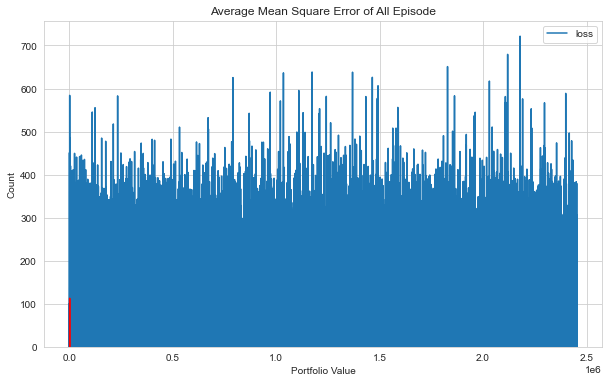

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

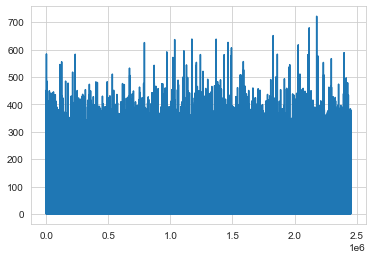

In [5]:
plt.plot(agent.model.losses)

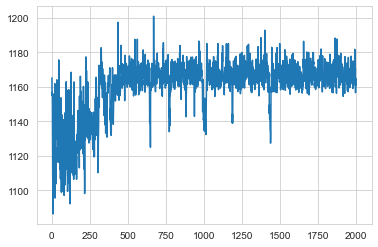

In [6]:
plt.plot(portfolio_value)

episode end value: 1122.09, duration: 0:00:00.117026
Sell: 251 times, Buy: 220 times


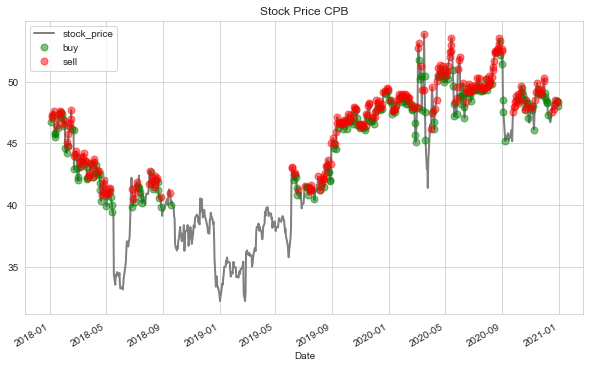

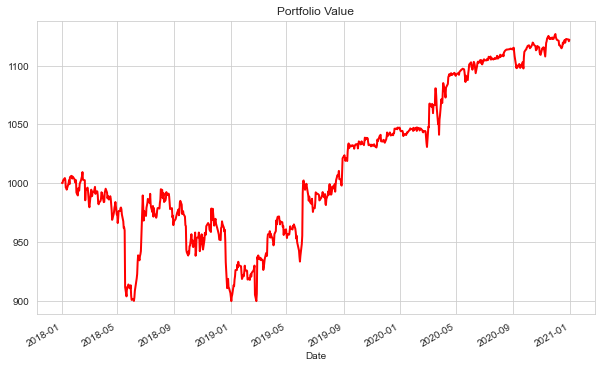

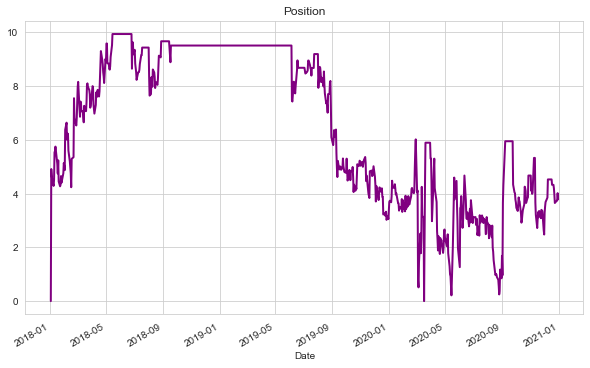

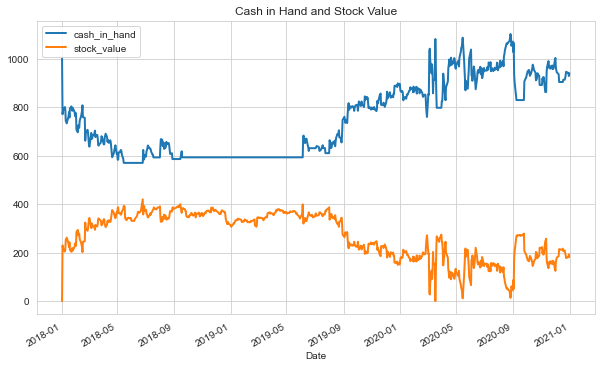

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: CPB
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 3.91 %
Volatility: 0.0871
shape ratio: 0.3233
Maximun drawdown: -10.88 %
Calmar ratio: 0.3597
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): 0.67 %
Volatility (benchmark): 0.2940
shape ratio: -0.0146
Maximun drawdown: -32.37 %
Calmar ratio (benchmark): 0.0207


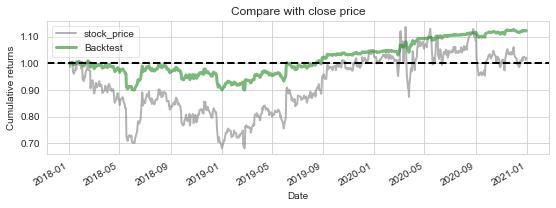

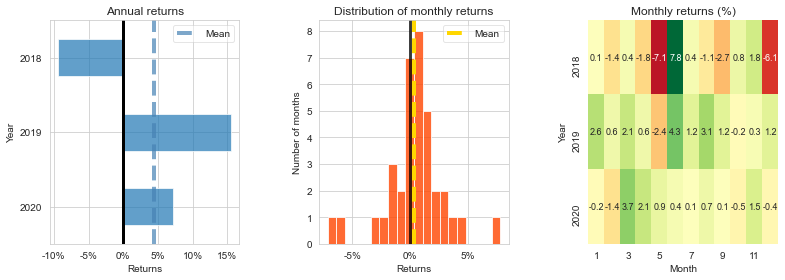

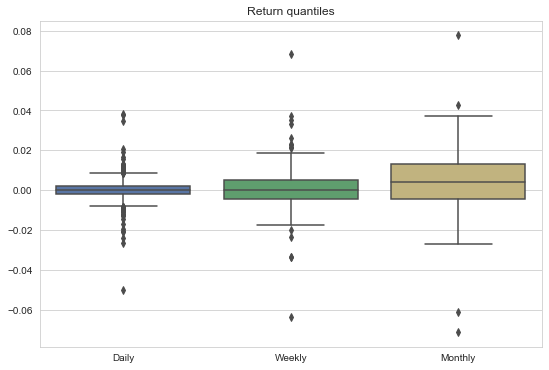

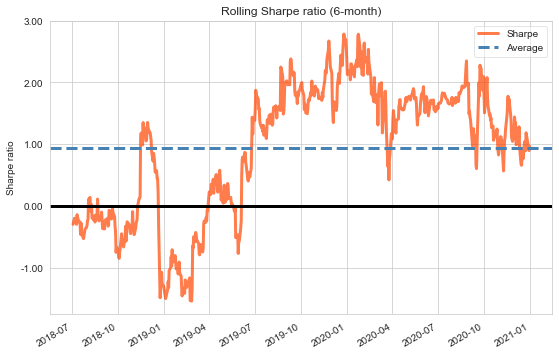

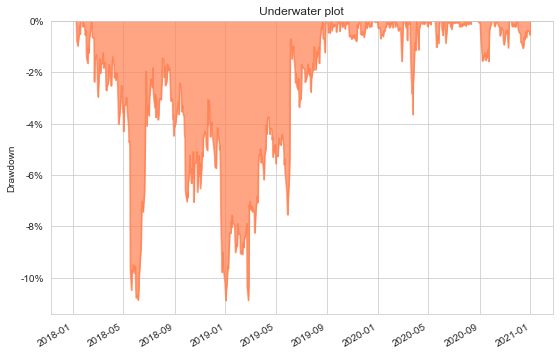

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')